### **Loading libraries**


In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, RandomFlip, RandomRotation, RandomZoom, Input, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

### **Load dataset from folder**


In [5]:
img_size = (48, 48)
batch_size = 32
epochs = 50

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_set = train_datagen.flow_from_directory(
    "FER/train",
    target_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_set = test_datagen.flow_from_directory(
    'FER/test',
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### **Improve data pipeline (prefetch + cache)**


In [6]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)

### **Data Augmentation Layer**


In [7]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])

number of classes / type of facial expressions


In [8]:
num_classes = 7

### **2D CNN Model**


In [9]:
model = Sequential()

model.add(Input(shape=(48, 48, 1)))

model.add(data_augmentation)

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,89

 Total params: 2,951,623 (11.26 MB)

 Trainable params: 2,949,575 (11.25 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

: 

In [ ]:
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=60,
    callbacks=[checkpoint]
)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.1883 - loss: 2.4143
Epoch 1: val_accuracy improved from None to 0.28699, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 476s 525ms/step - accuracy: 0.2168 - loss: 2.1083 - val_accuracy: 0.2870 - val_loss: 1.7338
Epoch 2/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.2734 - loss: 1.7749
Epoch 2: val_accuracy improved from 0.28699 to 0.35261, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 225s 251ms/step - accuracy: 0.3066 - loss: 1.7224 - val_accuracy: 0.3526 - val_loss: 1.6825
Epoch 3/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.3876 - loss: 1.5649
Epoch 3: val_accuracy improved from 0.35261 to 0.40931, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 214s 238ms/step - accuracy: 0.4030 - loss: 1.5303 - val_accuracy: 0.4093 - val_loss: 1.5581
Epoch 4/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.4431 - loss: 1.4432
Epoch 4: val_accuracy

Text(0.5, 1.0, 'Loss')

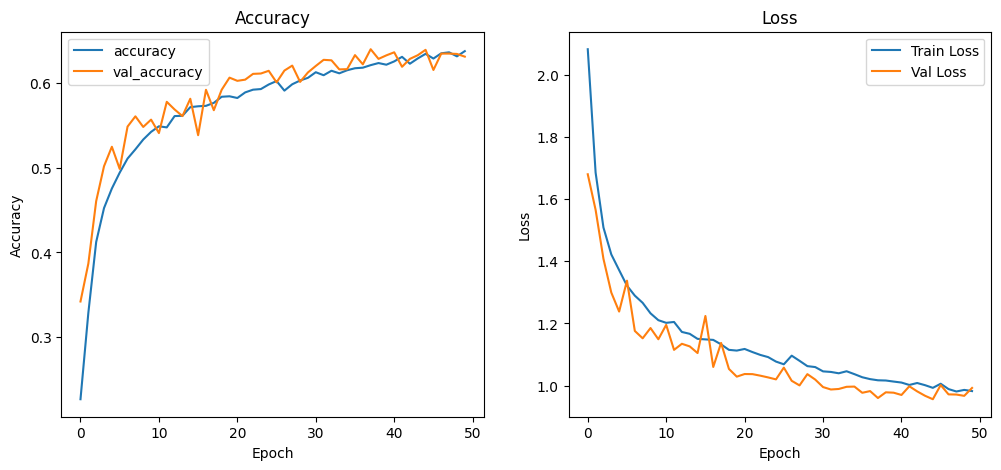

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print("Test Accuracy:", test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6312 - loss: 0.9923
Test Accuracy: 0.631234347820282
